In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score,accuracy_score
import nltk

In [ ]:
try:
    df = pd.read_csv('/content/spam.csv', encoding='latin1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')
    except UnicodeDecodeError:
        df = pd.read_csv('/content/spam.csv', encoding='utf-8')

In [ ]:
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.rename(columns={'v1':'Class','v2':'Text'},inplace=True)
df['numClass'] = df['Class'].map({'ham':0, 'spam':1})
df['Count']=0
for i in np.arange(0,len(df.Text)):
    df.loc[i,'Count'] = len(df.loc[i,'Text'])


In [ ]:
df.Class.unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
ham  = df[df.numClass == 0]
ham_count  = pd.DataFrame(pd.value_counts(ham['Count'],sort=True).sort_index())

In [ ]:
ham['Class'].count()

4825

In [ ]:
spam = df[df.numClass == 1]
spam_count = pd.DataFrame(pd.value_counts(spam['Count'],sort=True).sort_index())

In [ ]:
spam['Class'].count()

747

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopset = set(stopwords.words("english"))

In [ ]:
vectorizer = CountVectorizer(stop_words=stopset,binary=True)
vectorizer = CountVectorizer()

In [ ]:
X = vectorizer.fit_transform(df.Text)

In [ ]:
y = df.numClass

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,train_size=0.80,random_state=None)

In [ ]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("\n")
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 4457 samples.


Testing set has 1115 samples.


In [ ]:
objects = ['NB', 'SVC']

In [ ]:
def train_classifier(clf, X_train, y_train):
    clf.fit(X_train, y_train)

In [ ]:
def predict_labels(clf, features):
    return(clf.predict(features))

In [ ]:
A = MultinomialNB(alpha=1.0,fit_prior=True)
B=  LinearSVC()
C = KNeighborsClassifier(n_neighbors=1)
D = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=None)
E = AdaBoostClassifier(n_estimators=100)


clf = [A,B]
acc_score = [0,0]

In [ ]:
for a in range(0,2):
    print(objects[a])
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val = f1_score(y_test, y_pred)
    acc_score[a]=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    print("Accuracy in %:")
    print(acc_score[a]*100)
    print("F1 Score")
    print(pred_val)
    print("\n")

NB
Accuracy in %:
98.38565022421525
F1 Score
0.9423076923076924


SVC
Accuracy in %:
98.29596412556054
F1 Score
0.9364548494983277




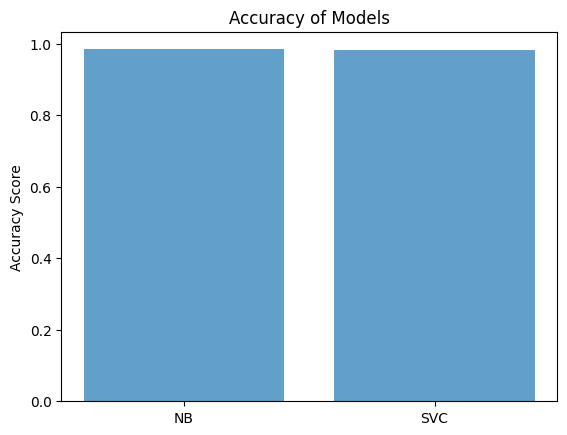

In [ ]:
y_pos = np.arange(len(objects))
y_val = [ x for x in acc_score]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()